## Introduction to Normality Tests in Python

Ref: MachineLearningMastery.com -- Jason Brownlee

An important decision point when working with a sample of data is whether to use parametric or nonparametric methods. Parametric methods assume that data has a known and specific distribution - often a Gaussian. If the sample data is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparameric statstiscal methods must be used.



#### Test Dataset

In [1]:
# Generate Gaussian Data

import numpy as np
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from matplotlib import pyplot

# Seed the random number generator
seed(1)

# Generate univariate observations
data = 5 * randn(100) + 50

# Summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


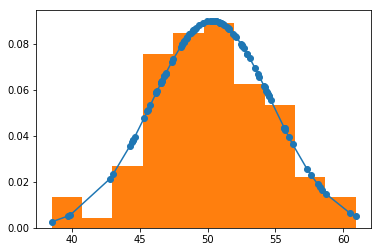

In [2]:
import numpy as np
import scipy.stats as stats
import pylab as pl

h = sorted(data)  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,density=True)      #use this to draw histogram of your data

pl.show()

## Shapiro-Wilk Test

Samuel Shapiro & Martin Wilk

In [3]:
from scipy.stats import shapiro

print('p <= alpha: Reject H0, not normal.')
print('p > alpha: Fail to reject H0, normal.')

stat, p = shapiro(data)
print('\nStatistics = %.5f, p = %.5f' %(stat, p))

# interpret
alpha = 0.05

if p > alpha:
    print('\nSample looks Gaussian (Fail to reject H0)')
else:
    print('Sample does not look Gaussian (Reject H0)')

p <= alpha: Reject H0, not normal.
p > alpha: Fail to reject H0, normal.

Statistics = 0.99200, p = 0.82154

Sample looks Gaussian (Fail to reject H0)


## Anderson-Darling Test
Theodore Anderson & Donald Darling

In [4]:
from scipy.stats import anderson

result = anderson(data)

print('Statistic: %.5f' % result.statistic)

p = 0
for i in range(len(result.critical_values)):
      sl, cv = result.significance_level[i], result.critical_values[i]
      if result.statistic < result.critical_values[i]:
          print('%3.f: %.3f, Data looks normal (fail to reject Ho)' %(sl, cv))
      else:
          print('%3.f: %.3f, Data looks normal (fail to reject Ho)' %(sl, cv))



Statistic: 0.21965
 15: 0.555, Data looks normal (fail to reject Ho)
 10: 0.632, Data looks normal (fail to reject Ho)
  5: 0.759, Data looks normal (fail to reject Ho)
  2: 0.885, Data looks normal (fail to reject Ho)
  1: 1.053, Data looks normal (fail to reject Ho)


## D'Agostino's K^2 Test
Ralph D'Agostino

Calculates summary statistics from the data, namely Kurtosis and skewness,
to determine if the data distribution departs from the normal distribution

In [5]:
from scipy.stats import normaltest

stat, p = normaltest(data)

print('Statistics = %.3f, p = %.3f' %(stat, p))

# interpret
alpha = 0.05

if p > alpha:
    print('\nSample looks Gaussian (Fail to reject H0)')
else:
    print('Sample does not look Gaussian (Reject H0)')

Statistics = 0.102, p = 0.950

Sample looks Gaussian (Fail to reject H0)


### Thank You!